In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

df = pd.read_csv('Employee.csv')


In [14]:

# Data Exploration
print("Data Exploration:")
print("Shape of the dataset:", df.shape)
print("\nUnique values in each feature:")
for column in df.columns:
    print(f"{column}: {df[column].nunique()} - {df[column].unique()}")

print("\nStatistical analysis:")
print(df.describe())

Data Exploration:
Shape of the dataset: (148, 6)

Unique values in each feature:
Company: 6 - ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Age: 29 - [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Salary: 40 - [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Place: 11 - ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Country: 1 - ['India']
Gender: 2 - [0 1]

Statistical analysis:
              Age       Salary      Gender
count  130.000000   124.000000  148.000000
mean    30.484615  5312.467742    0.222973
std     11.096640  2573.764683    0.417654
min      0.000000  1089.000000    0.000000
25%     22.000000 

In [15]:

# Rename columns
df.columns = ['company', 'age', 'salary', 'place', 'country', 'gender']


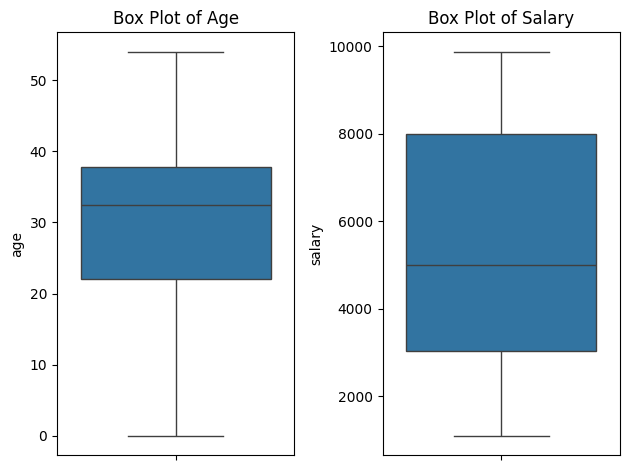

In [16]:
# Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Box Plot of Age')

# Salary
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary'])
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()

In [17]:
# Data Cleaning
print("\nData Cleaning:")
print("Missing values before cleaning:")
print(df.isnull().sum())


Data Cleaning:
Missing values before cleaning:
company     8
age        18
salary     24
place      14
country     0
gender      0
dtype: int64


In [18]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)


In [19]:
# Replace 0 in age with NaN
df['age'] = df['age'].replace(0, np.nan)


In [20]:
# Treat null values
imputer = SimpleImputer(strategy='mean')
df[['age', 'salary']] = imputer.fit_transform(df[['age', 'salary']])

In [21]:
# For categorical columns, fill with mode 
df['company'] = df['company'].fillna(df['company'].mode()[0])
df['place'] = df['place'].fillna(df['place'].mode()[0])

print("\nMissing values after cleaning:")
print(df.isnull().sum())



Missing values after cleaning:
company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64


Outliers detected using Z-score method:
Age outliers:
Series([], Name: age, dtype: float64)

Salary outliers:
Series([], Name: salary, dtype: float64)

Outliers detected using IQR method (factor = 1.5):
Age outliers:
Series([], Name: age, dtype: float64)

Salary outliers:
Series([], Name: salary, dtype: float64)


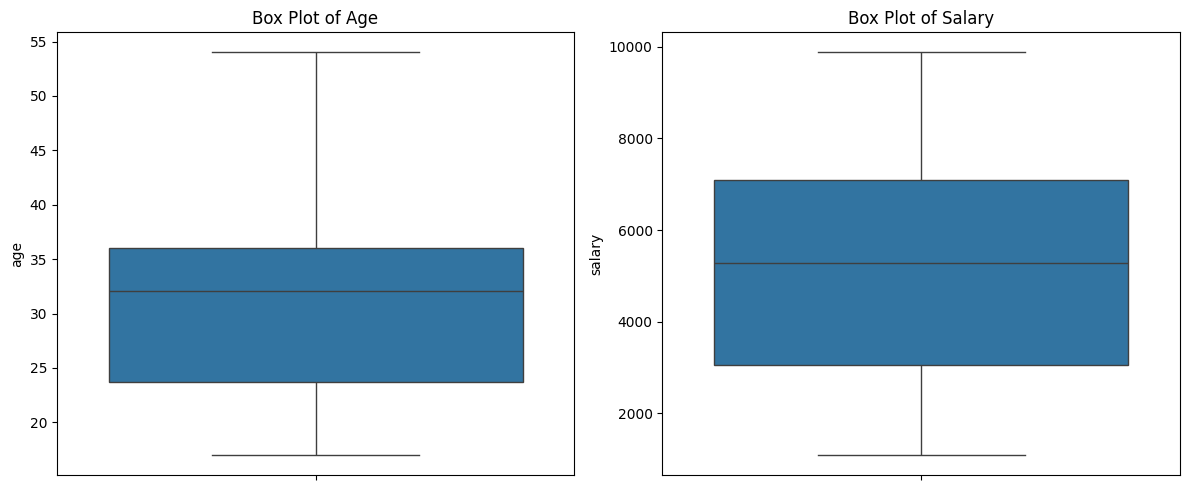

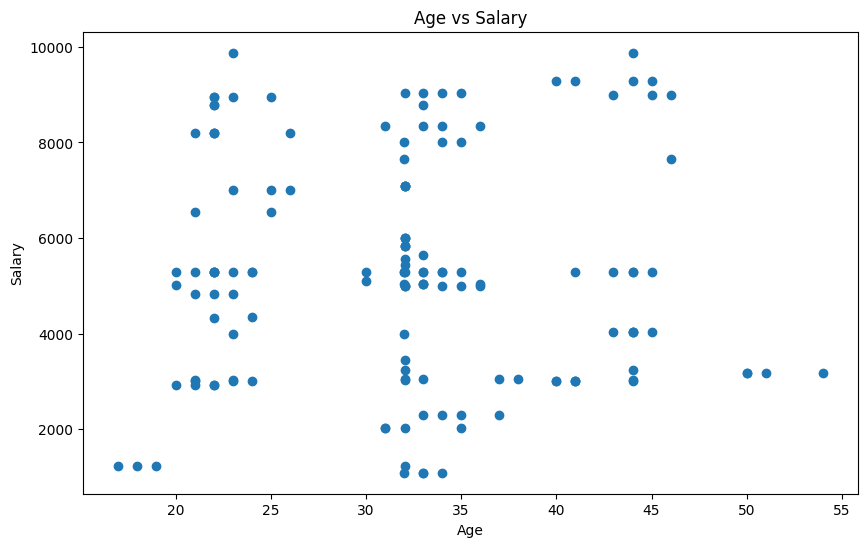


Summary Statistics:
              age       salary
count  144.000000   144.000000
mean    32.041322  5283.471074
std      8.234667  2368.350165
min     17.000000  1089.000000
25%     23.750000  3045.000000
50%     32.041322  5283.471074
75%     36.000000  7084.000000
max     54.000000  9876.000000

Top 5 highest ages:
      age  salary
93   54.0  3184.0
57   51.0  3184.0
21   50.0  3184.0
129  50.0  3184.0
30   46.0  7654.0

Top 5 highest salaries:
      age  salary
28   23.0  9876.0
117  44.0  9876.0
27   45.0  9284.0
63   41.0  9284.0
99   44.0  9284.0


In [22]:
from scipy import stats 
def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs(stats.zscore(data))
    return data[z_scores > threshold]

def detect_outliers_iqr(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

# Z-score method
print("Outliers detected using Z-score method:")
print("Age outliers:")
print(detect_outliers_zscore(df['age']))
print("\nSalary outliers:")
print(detect_outliers_zscore(df['salary']))

# IQR method 
print("\nOutliers detected using IQR method (factor = 1.5):")
print("Age outliers:")
print(detect_outliers_iqr(df['age']))
print("\nSalary outliers:")
print(detect_outliers_iqr(df['salary']))

plt.figure(figsize=(12, 5))

# Age
plt.subplot(1, 2, 1)
sns.boxplot(y=df['age'])
plt.title('Box Plot of Age')

# Salary
plt.subplot(1, 2, 2)
sns.boxplot(y=df['salary'])
plt.title('Box Plot of Salary')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

print("\nSummary Statistics:")
print(df[['age', 'salary']].describe())

print("\nTop 5 highest ages:")
print(df.nlargest(5, 'age')[['age', 'salary']])
print("\nTop 5 highest salaries:")
print(df.nlargest(5, 'salary')[['age', 'salary']])


Data Analysis:
Number of people with age > 40 and salary < 5000: 15


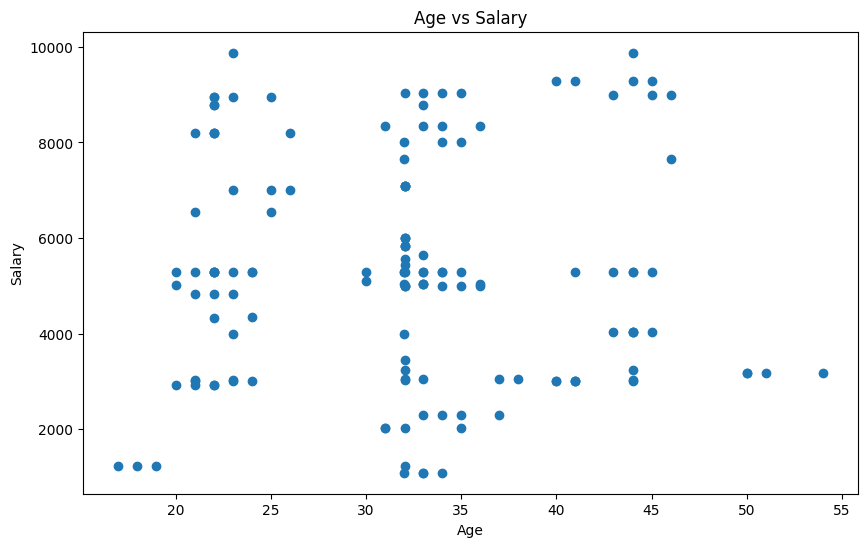

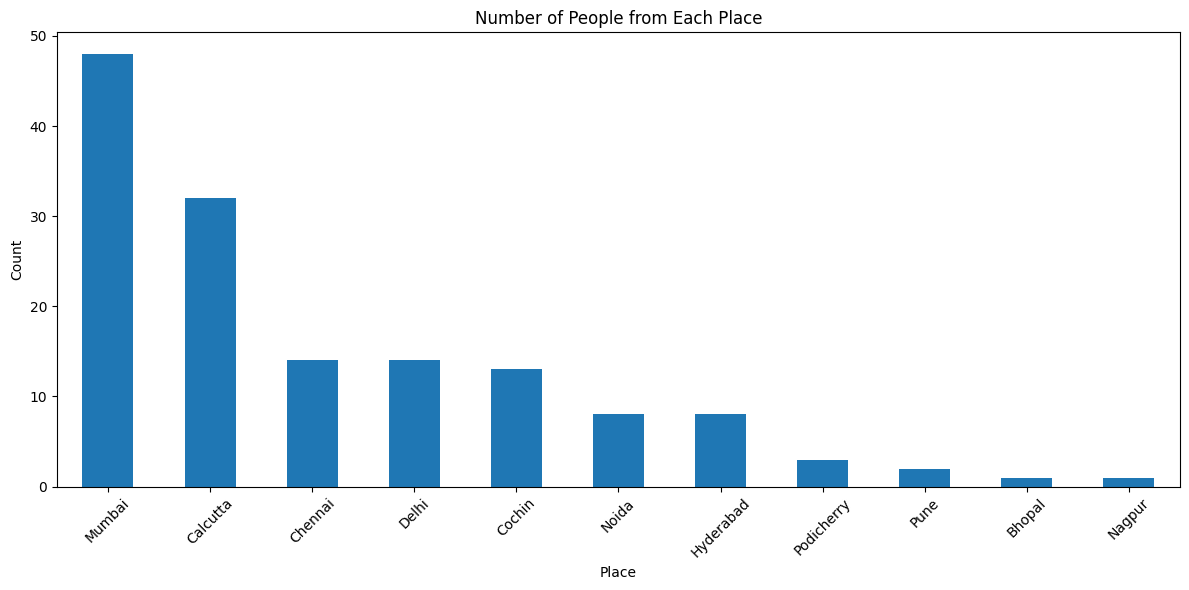

In [23]:
# Data Analysis
print("\nData Analysis:")
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
print("Number of people with age > 40 and salary < 5000:", len(filtered_df))

plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

place_counts = df['place'].value_counts()
plt.figure(figsize=(12, 6))
place_counts.plot(kind='bar')
plt.title('Number of People from Each Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Data Encoding
print("\nData Encoding:")
df_encoded = pd.get_dummies(df, columns=['company', 'place', 'country', 'gender'])
print("Shape after encoding:", df_encoded.shape)



Data Encoding:
Shape after encoding: (144, 22)


In [25]:
# Feature Scaling
print("\nFeature Scaling:")
scaler = StandardScaler()
df_scaled_standard = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

scaler = MinMaxScaler()
df_scaled_minmax = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

print("Sample of StandardScaler scaled data:")
print(df_scaled_standard.head())
print("\nSample of MinMaxScaler scaled data:")
print(df_scaled_minmax.head())


Feature Scaling:
Sample of StandardScaler scaled data:
        age    salary  company_CTS  company_Congnizant  company_Infosys  \
0 -1.467376  0.000000    -0.566658           -0.118678        -0.652490   
1 -0.248759  0.000000    -0.566658           -0.118678         1.532592   
2  0.360549 -1.264122    -0.566658           -0.118678        -0.652490   
3  0.969858 -0.967526    -0.566658           -0.118678         1.532592   
4 -1.101791 -0.543818    -0.566658           -0.118678        -0.652490   

   company_Infosys Pvt Lmt  company_TCS  company_Tata Consultancy Services  \
0                -0.118678     1.183216                          -0.118678   
1                -0.118678    -0.845154                          -0.118678   
2                -0.118678     1.183216                          -0.118678   
3                -0.118678    -0.845154                          -0.118678   
4                -0.118678     1.183216                          -0.118678   

   place_Bhopal  place_C